In [9]:
# Importações gerais
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento de dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Modelos de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Validação de modelos
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Configuração de gráficos
sns.set(style="whitegrid")

# Carregando os dados
df = pd.read_csv('/content/Employee-Attrition.csv')

# Exibição inicial dos dados
print("Dimensões do dataset:", df.shape)
print("\nVisualização inicial do dataset:")
print(df.head())

# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
df.info()

# Valores duplicados
total_registros = len(df)             # Registros totais do dataset
duplicados = df.duplicated().sum()    # Registros duplicados

print(f"Possui {total_registros} registros, sendo {duplicados} duplicados")


Dimensões do dataset: (1470, 35)

Visualização inicial do dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ... 


Estatísticas descritivas das variáveis numéricas:
                           count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0  

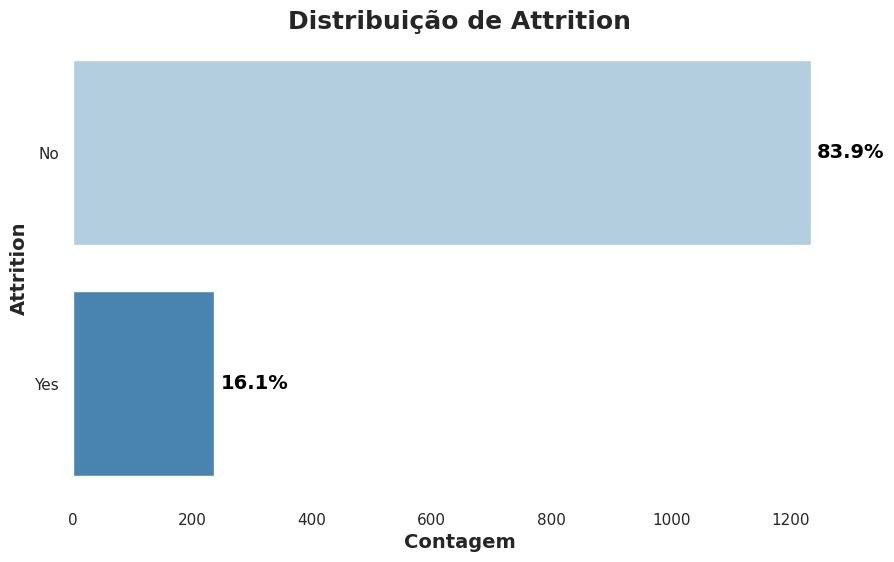


Correlação entre variáveis numéricas:


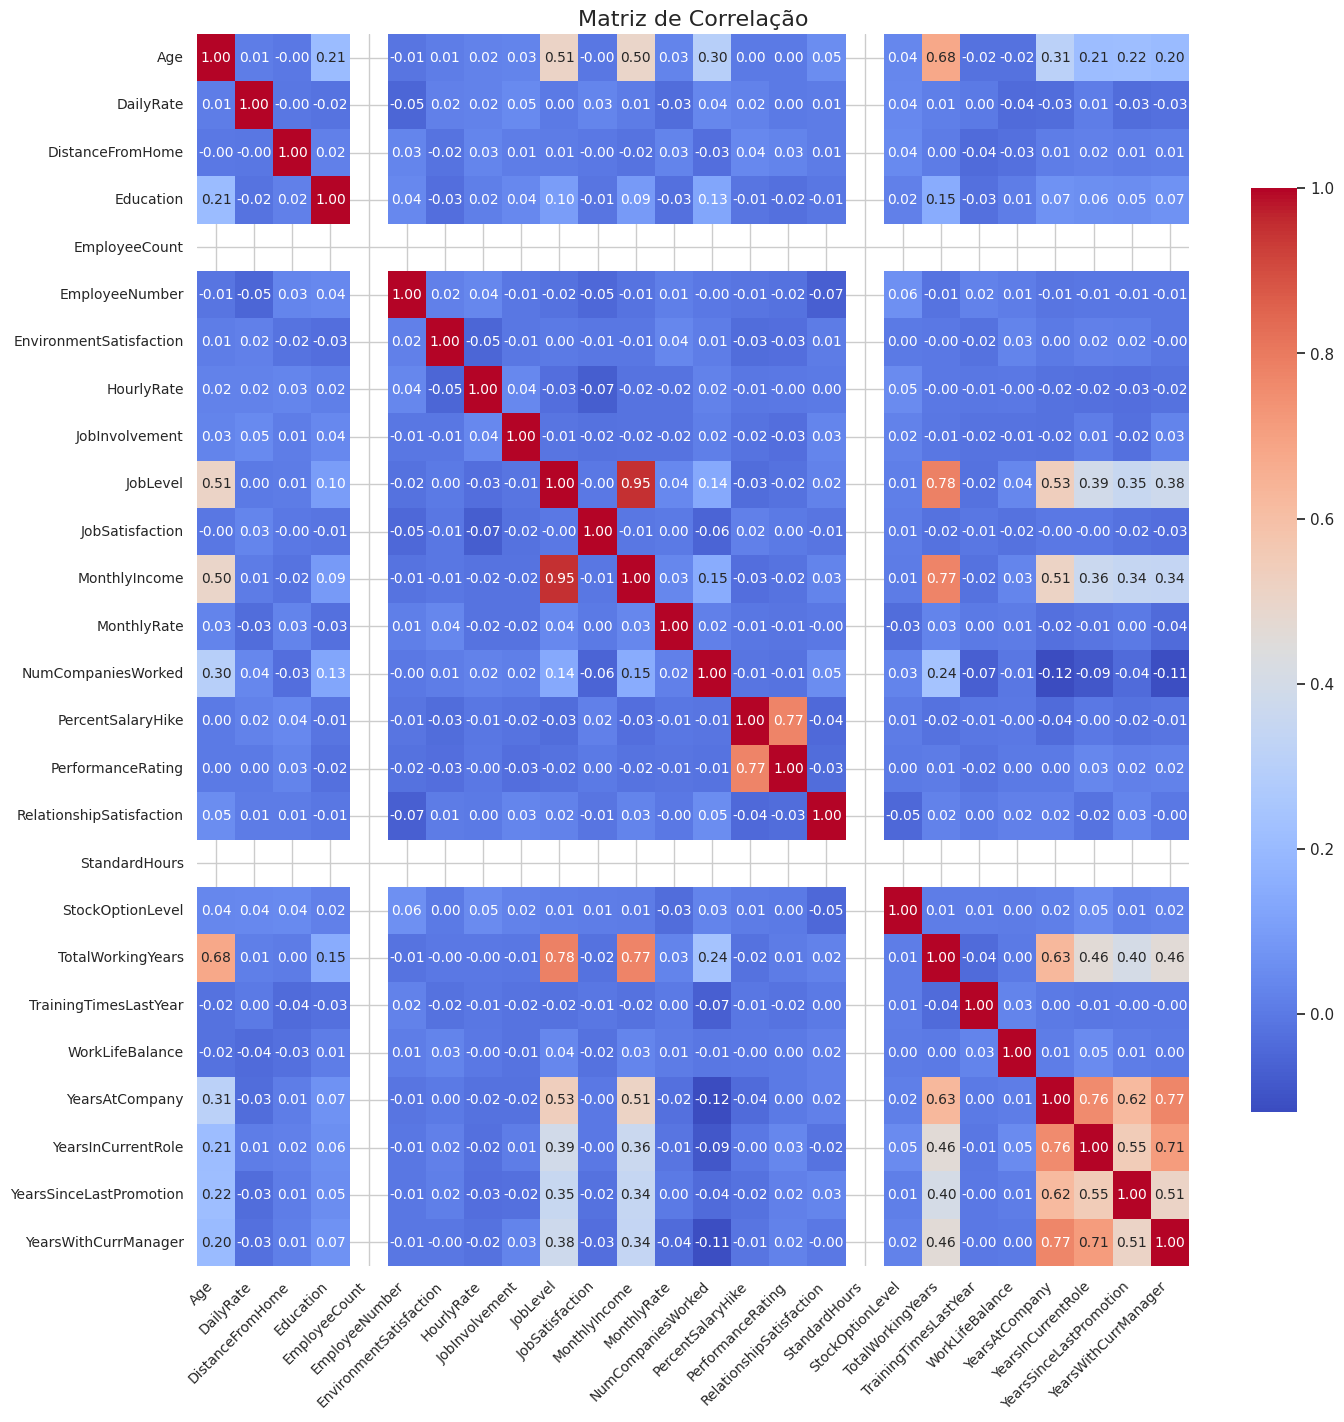

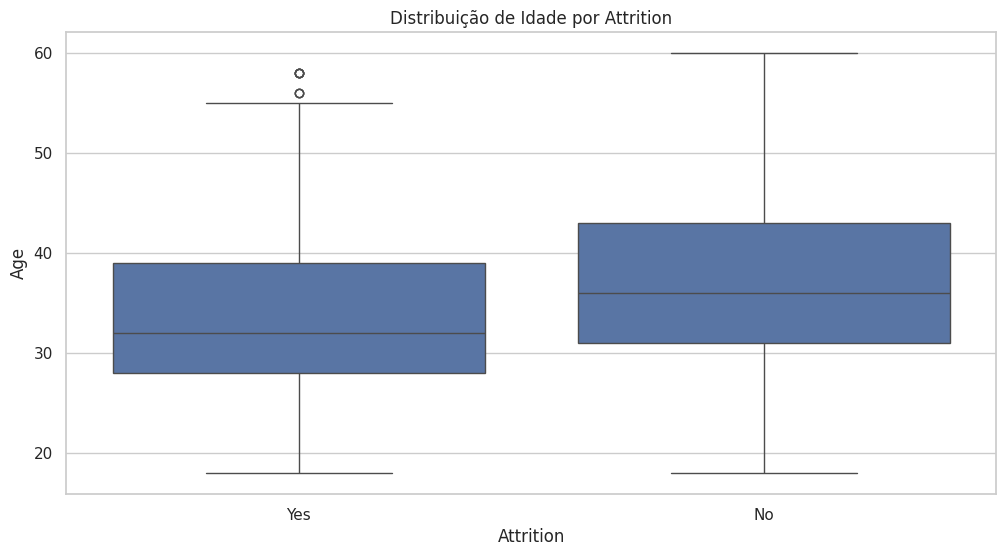

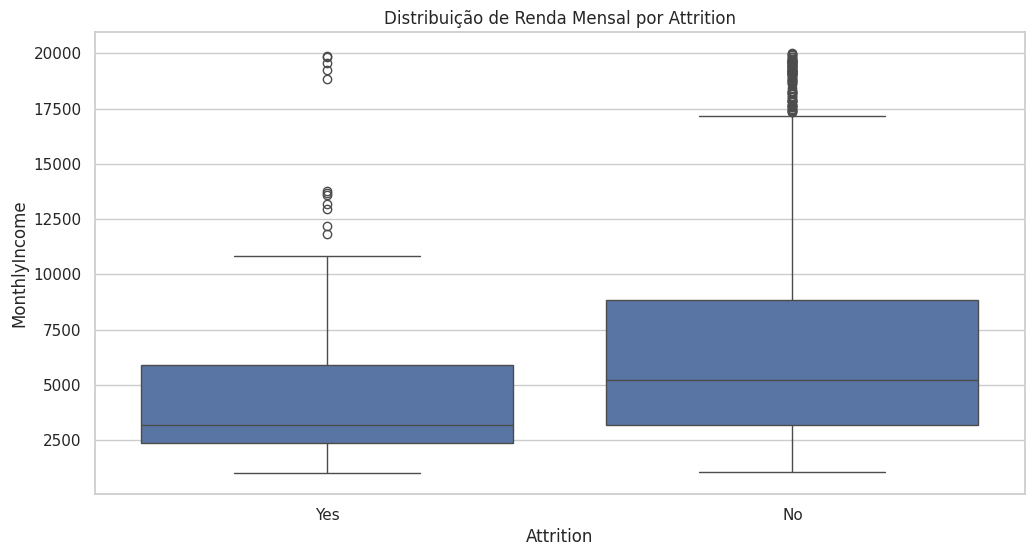

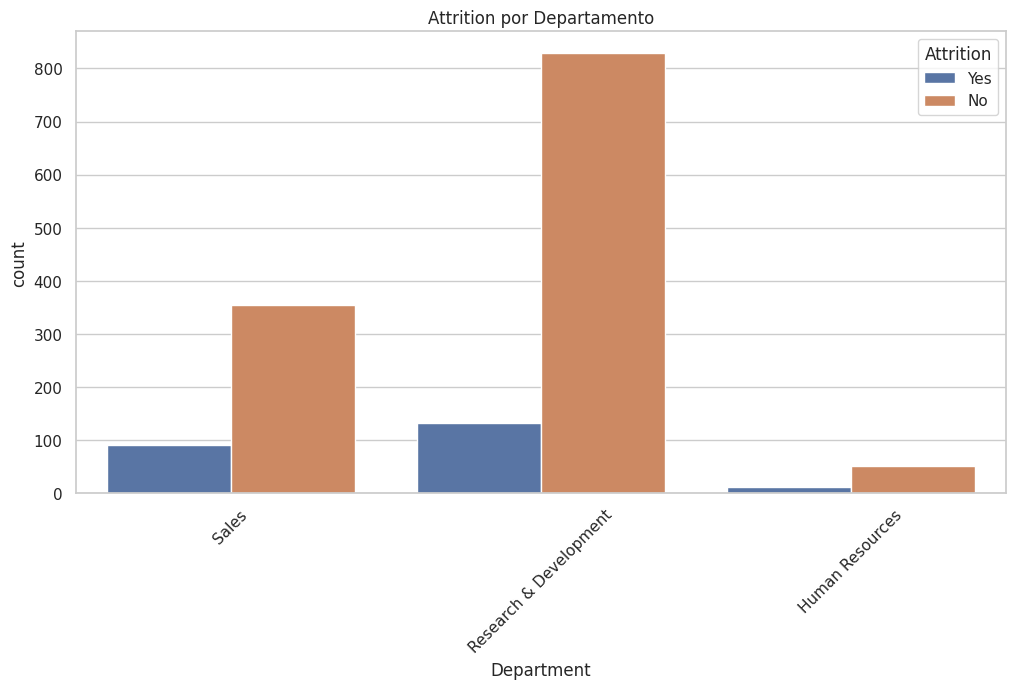

In [10]:
# Descrição estatística das variáveis numéricas
print("\nEstatísticas descritivas das variáveis numéricas:")
print(df.describe().T)

# Descrição estatística das variáveis categóricas
print("\nAnálise das variáveis categóricas:")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\nValores únicos da coluna {col}:")
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    count_percentage_df = pd.DataFrame({'Contagem': value_counts, 'Porcentagem (%)': percentages})
    print(count_percentage_df)

# Verificando valores ausentes
print("\nValores ausentes por coluna:")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Filtrando apenas colunas com valores ausentes
missing_data = pd.DataFrame({
    'Valores Ausentes': missing_values,
    'Percentual (%)': missing_percent
})

# Exibindo apenas as colunas que possuem valores ausentes
print(missing_data[missing_data['Valores Ausentes'] > 0])

# Gráfico de Barras Horizontais para a distribuição de 'Attrition'
plt.figure(figsize=(10, 6))
attrition_counts = df['Attrition'].value_counts()
ax = sns.barplot(x=attrition_counts.values, y=attrition_counts.index, palette='Blues')
total = len(df)
for i, v in enumerate(attrition_counts):
    percentage = f'{100 * v / total:.1f}%'
    ax.text(v + 10, i, percentage, color='black', va='center', fontsize=14, fontweight='bold')
plt.title("Distribuição de Attrition", fontsize=18, fontweight='bold')
plt.xlabel("Contagem", fontsize=14, fontweight='bold')
plt.ylabel("Attrition", fontsize=14, fontweight='bold')
sns.despine(left=True, bottom=True)
ax.grid(False)
plt.show()

# Análise da correlação entre variáveis numéricas
print("\nCorrelação entre variáveis numéricas:")
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plotando o heatmap de correlação
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10}, cbar_kws={"shrink": 0.75})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Matriz de Correlação", fontsize=16)
plt.show()

# Análise adicional para variáveis importantes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Distribuição de Idade por Attrition')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Distribuição de Renda Mensal por Attrition')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition por Departamento')
plt.xticks(rotation=45)
plt.show()


In [11]:
# Tratando valores ausentes (se houver)
# Como não há valores ausentes no dataset fornecido, este passo pode ser omitido
# No entanto, mantemos o código como boa prática

# Imputação de valores ausentes para variáveis numéricas com a mediana
num_imputer = SimpleImputer(strategy='median')
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = num_imputer.fit_transform(df[numeric_columns])

# Imputação de valores ausentes para variáveis categóricas com o valor mais frequente
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

# Verifica se todos os valores ausentes foram tratados
print("Valores ausentes restantes:", df.isnull().sum().sum())

# Identifica as colunas categóricas
cat_cols = df.select_dtypes(include=['object']).columns

# Exclui a variável-alvo 'Attrition' para não codificá-la
cat_cols = cat_cols.drop('Attrition')

# Aplica One-Hot Encoding para variáveis categóricas não-ordenadas
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Aplica Label Encoding para a variável-alvo 'Attrition'
label_enc = LabelEncoder()
df['Attrition'] = label_enc.fit_transform(df['Attrition'])

# Exibe as primeiras linhas após a codificação
print(df.head())

# Identifica as colunas numéricas para escalonamento (excluindo a variável-alvo 'Attrition')
num_cols = df.select_dtypes(include=[np.number]).columns.drop('Attrition')

# Escalonamento com StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Divisão dos dados em treino e teste
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Exibe as dimensões dos conjuntos de treino e teste
print("Dimensões do conjunto de treino:", X_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape)


Valores ausentes restantes: 0
    Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  41.0          1     1102.0               1.0        2.0            1.0   
1  49.0          0      279.0               8.0        1.0            1.0   
2  37.0          1     1373.0               2.0        2.0            1.0   
3  33.0          0     1392.0               3.0        4.0            1.0   
4  27.0          0      591.0               2.0        1.0            1.0   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0             1.0                      2.0        94.0             3.0  ...   
1             2.0                      3.0        61.0             2.0  ...   
2             4.0                      4.0        92.0             2.0  ...   
3             5.0                      4.0        56.0             3.0  ...   
4             7.0                      1.0        40.0             3.0  ...   

   JobRole_Laboratory Technician


Relatório de Classificação - RandomForest

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           1       0.50      0.10      0.16        71

    accuracy                           0.84       441
   macro avg       0.68      0.54      0.54       441
weighted avg       0.79      0.84      0.79       441

ROC AUC para o modelo RandomForest: 0.76


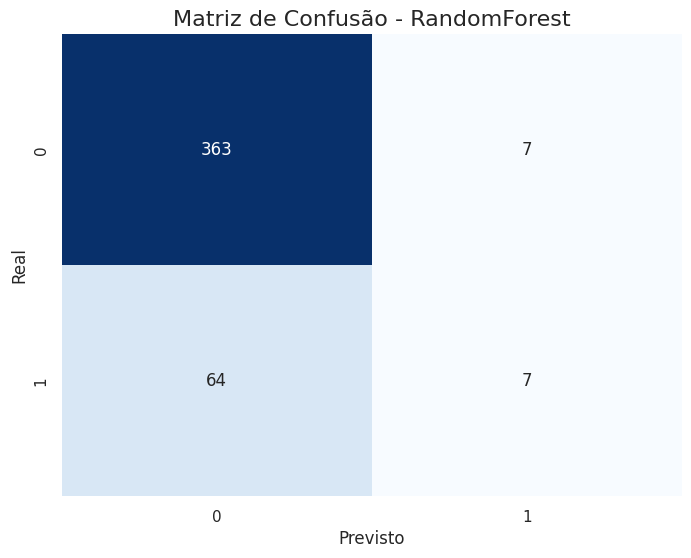


Relatório de Classificação - LogisticRegression

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       370
           1       0.72      0.39      0.51        71

    accuracy                           0.88       441
   macro avg       0.81      0.68      0.72       441
weighted avg       0.86      0.88      0.86       441

ROC AUC para o modelo LogisticRegression: 0.82


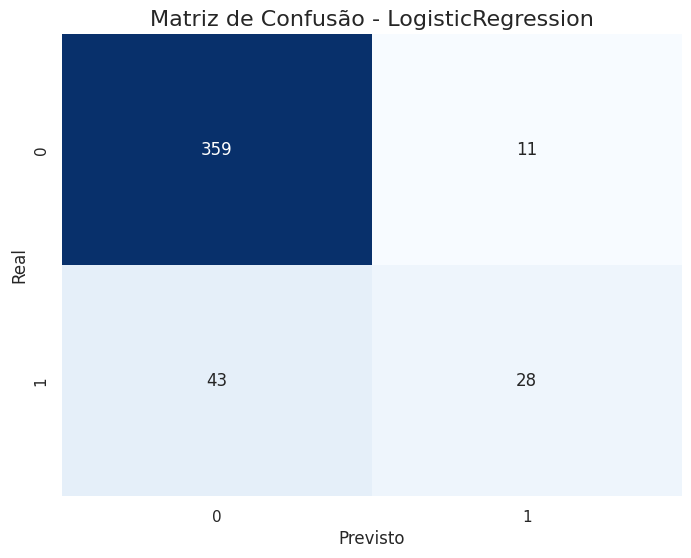

Acurácia média com validação cruzada para RandomForest: 0.86
Acurácia média com validação cruzada para LogisticRegression: 0.88


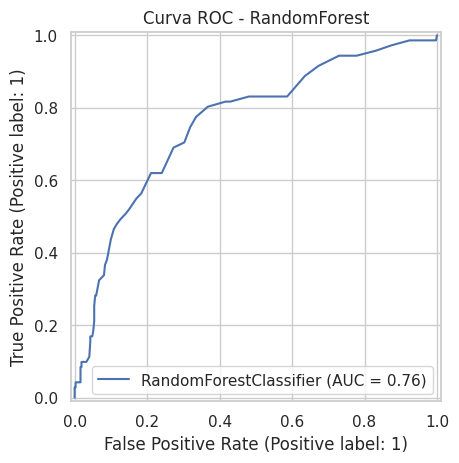

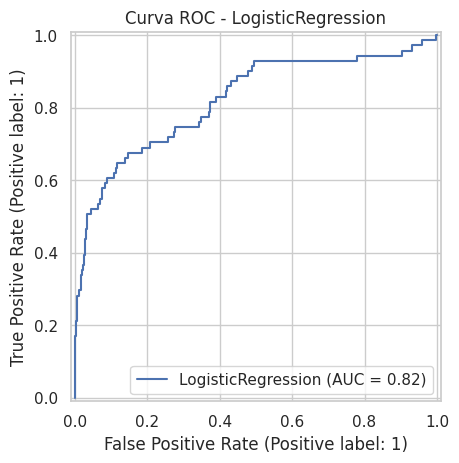

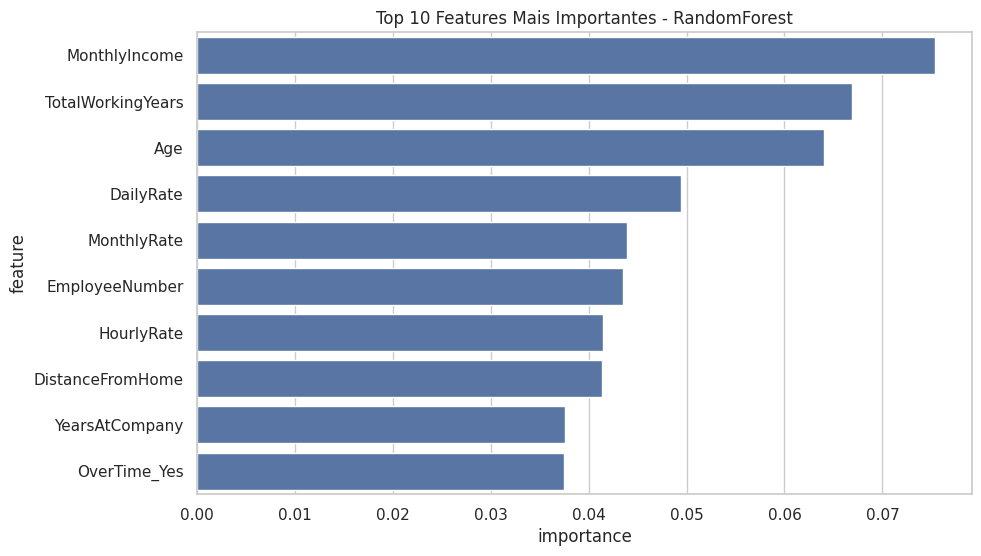

In [12]:
# Criando a instância do modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Treinamento do modelo com os dados de treino
rf_model.fit(X_train, y_train)

# Avaliação do modelo no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Relatório de classificação
rf_classification_report = classification_report(y_test, y_pred_rf)

# Matriz de confusão
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

# Cálculo do ROC AUC
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Exibe o relatório de classificação e o ROC AUC
print("\nRelatório de Classificação - RandomForest\n")
print(rf_classification_report)
print(f"ROC AUC para o modelo RandomForest: {rf_roc_auc:.2f}")

# Exibe a matriz de confusão em forma de gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - RandomForest', fontsize=16)
plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

# Criando a instância do modelo LogisticRegression
lr_model = LogisticRegression(random_state=42)

# Treinamento do modelo com os dados de treino
lr_model.fit(X_train, y_train)

# Avaliação do modelo no conjunto de teste
y_pred_lr = lr_model.predict(X_test)

# Relatório de classificação
lr_classification_report = classification_report(y_test, y_pred_lr)

# Matriz de confusão
lr_confusion_matrix = confusion_matrix(y_test, y_pred_lr)

# Cálculo do ROC AUC
lr_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

# Exibe o relatório de classificação e o ROC AUC
print("\nRelatório de Classificação - LogisticRegression\n")
print(lr_classification_report)
print(f"ROC AUC para o modelo LogisticRegression: {lr_roc_auc:.2f}")

# Exibe a matriz de confusão em forma de gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - LogisticRegression', fontsize=16)
plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

# Validação cruzada para RandomForest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácia média com validação cruzada para RandomForest: {rf_cv_scores.mean():.2f}")

# Validação cruzada para LogisticRegression
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácia média com validação cruzada para LogisticRegression: {lr_cv_scores.mean():.2f}")

# Curva ROC para RandomForest
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Curva ROC - RandomForest")
plt.show()

# Curva ROC para LogisticRegression
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.title("Curva ROC - LogisticRegression")
plt.show()

# Importância das features para RandomForest
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Features Mais Importantes - RandomForest')
plt.show()


Melhores parâmetros para RandomForest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

Relatório de Classificação - RandomForest (após tuning)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       370
           1       0.40      0.11      0.18        71

    accuracy                           0.83       441
   macro avg       0.63      0.54      0.54       441
weighted avg       0.78      0.83      0.79       441

ROC AUC para o modelo RandomForest (após tuning): 0.77
Melhores parâmetros para Regressão Logística: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Relatório de Classificação - Regressão Logística (após tuning)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       370
           1       0.71      0.41      0.52        71

    accuracy                           0.88       441
   macro avg       0.80      0.69      0.72       441


<Figure size 1000x800 with 0 Axes>

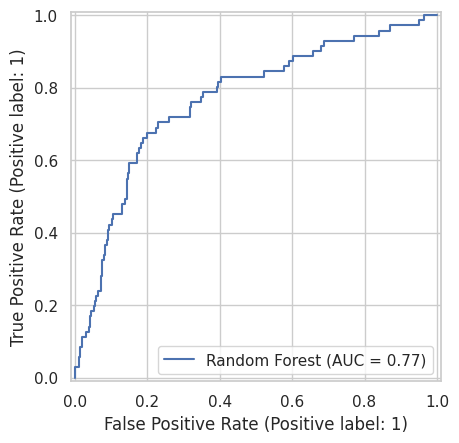

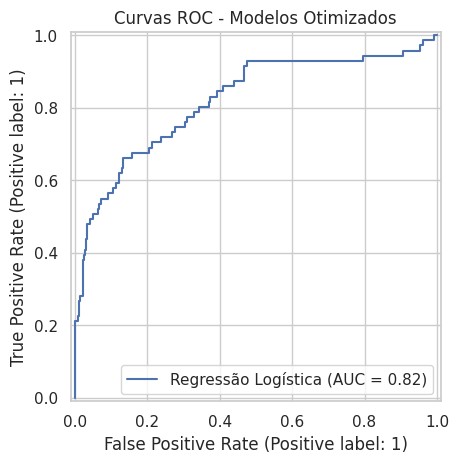

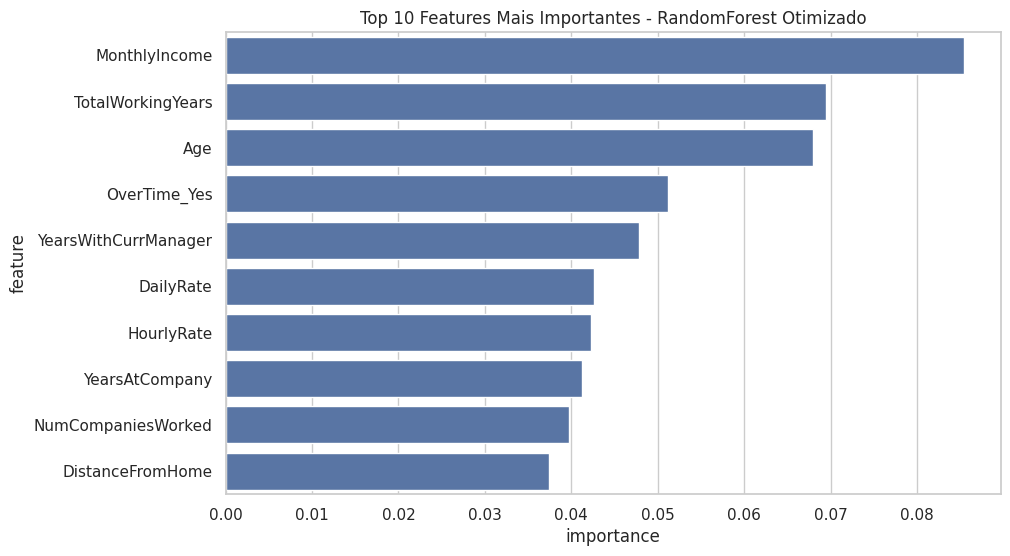

In [13]:
# Definindo o grid de parâmetros para RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando a instância do modelo de RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Configurando o GridSearchCV para RandomForest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar o modelo nos dados de treino
grid_search_rf.fit(X_train, y_train)

# Exibir os melhores parâmetros
print("Melhores parâmetros para RandomForest:", grid_search_rf.best_params_)

# Reavaliar o modelo com os melhores parâmetros
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_classification_report = classification_report(y_test, y_pred_best_rf)
best_rf_roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Exibir os resultados do tuning de RandomForest
print("\nRelatório de Classificação - RandomForest (após tuning)\n")
print(best_rf_classification_report)
print(f"ROC AUC para o modelo RandomForest (após tuning): {best_rf_roc_auc:.2f}")

# Definindo o grid de parâmetros para Regressão Logística
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Criando a instância do modelo de Regressão Logística
lr_model = LogisticRegression(random_state=42)

# Configurando o GridSearchCV para Regressão Logística
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr,
                              cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar o modelo nos dados de treino
grid_search_lr.fit(X_train, y_train)

# Exibir os melhores parâmetros
print("Melhores parâmetros para Regressão Logística:", grid_search_lr.best_params_)

# Reavaliar o modelo com os melhores parâmetros
best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test)
best_lr_classification_report = classification_report(y_test, y_pred_best_lr)
best_lr_roc_auc = roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1])

# Exibir os resultados do tuning de Regressão Logística
print("\nRelatório de Classificação - Regressão Logística (após tuning)\n")
print(best_lr_classification_report)
print(f"ROC AUC para o modelo Regressão Logística (após tuning): {best_lr_roc_auc:.2f}")

# Comparação final dos modelos
print("\nComparação final dos modelos:")
print(f"RandomForest ROC AUC: {best_rf_roc_auc:.2f}")
print(f"Regressão Logística ROC AUC: {best_lr_roc_auc:.2f}")

# Plotando as curvas ROC dos modelos otimizados
plt.figure(figsize=(10, 8))
RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test, name='Random Forest')
RocCurveDisplay.from_estimator(best_lr_model, X_test, y_test, name='Regressão Logística')
plt.title("Curvas ROC - Modelos Otimizados")
plt.legend(loc="lower right")
plt.show()

# Importância das features para o melhor modelo RandomForest
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Features Mais Importantes - RandomForest Otimizado')
plt.show()